# Moving Average, Triangular 

https://www.barchart.com/education/technical-indicators/moving_average_triangular

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# Input
symbol = 'AAPL'
index_symbol = '^GSPC'  # S&P 500 index symbol
start = '2018-09-01'
end = '2019-01-01'
n = 20  # Moving average period

# Read data for the symbol and the index
df = yf.download(symbol, start, end)
df_index = yf.download(index_symbol, start, end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461620,109560400
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106274,133332000
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207169,137160000
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777874,150479200
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069553,158066000


In [3]:
# Function to calculate Simple Moving Average (SMA)
def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

# Function to calculate Triangular Moving Average (TMA)
def TMA(data, period=30, column='Close'):
    sma = SMA(data, period, column)
    tma = SMA(pd.DataFrame(sma), period, column)
    return tma

In [4]:
n = 20

df['TMA'] = TMA(df, period=n)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,TMA
Date,,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461620,109560400,NaN
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106274,133332000,NaN
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207169,137160000,NaN
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777874,150479200,NaN
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069553,158066000,NaN


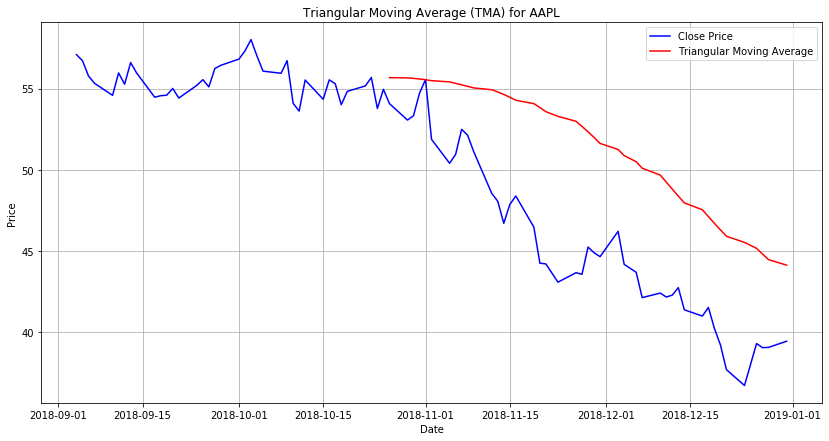

In [6]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['TMA'], label='Triangular Moving Average', color='red')
plt.title(f'Triangular Moving Average (TMA) for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Candlestick with Moving Average, Triangular 

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,TMA,VolumePositive
0,736941.0,57.102501,57.294998,56.657501,57.090000,54.461620,109560400,NaN,False
1,736942.0,57.247501,57.417500,56.275002,56.717499,54.106274,133332000,NaN,False
2,736943.0,56.557499,56.837502,55.325001,55.775002,53.207169,137160000,NaN,False
3,736944.0,55.462502,56.342499,55.177502,55.325001,52.777874,150479200,NaN,False
4,736947.0,55.237499,55.462502,54.117500,54.582500,52.069553,158066000,NaN,False


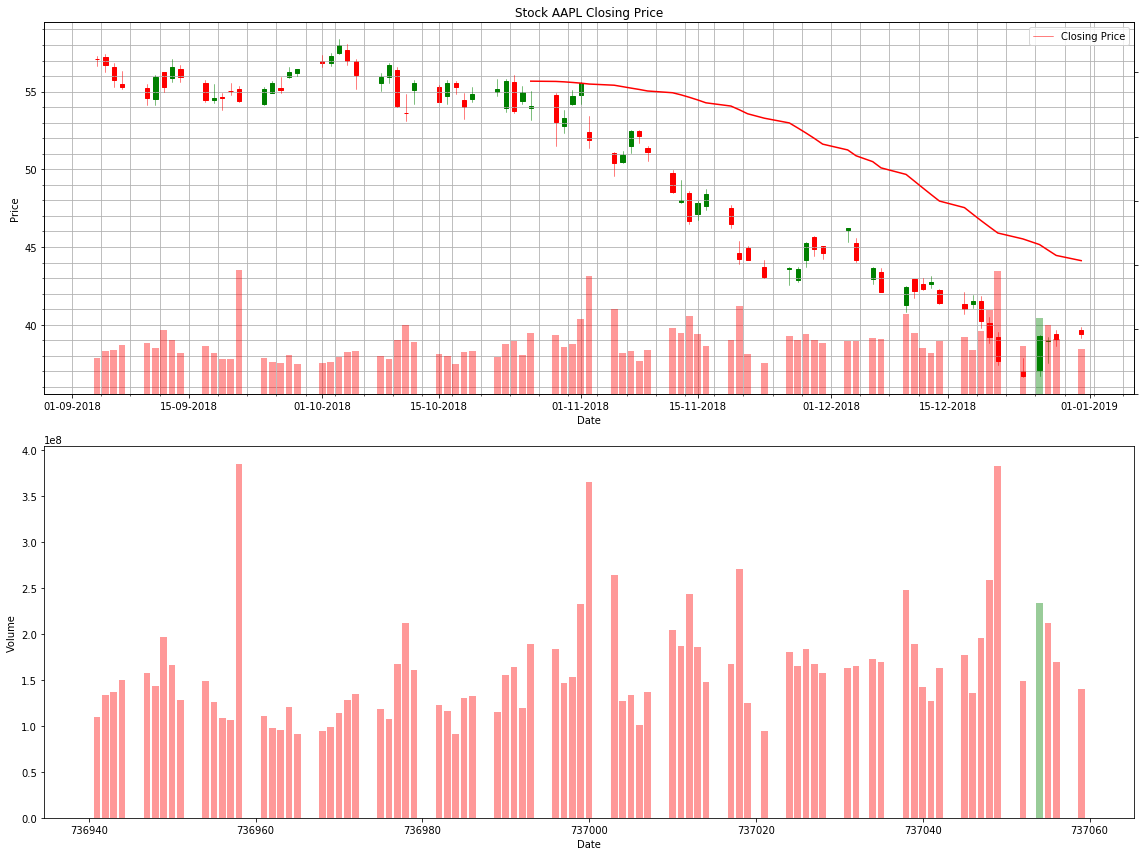

<Figure size 432x288 with 0 Axes>

In [8]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(16,12))

ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1, dfc[['Date', 'Open', 'High', 'Low', 'Close']].values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['TMA'], label='Triangular Moving Average', color='red')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3 * dfc.Volume.max())
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(['Closing Price'], loc='best')

ax2 = plt.subplot(2, 1, 2)
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax2.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()